# WFDB resampling demo

In [1]:
import os
import sys
import wfdb

sys.path.append(os.path.abspath(os.path.join('/workspaces/ECG-ML-Challenge/notebooks/', "..")))
from src import dataset
from src import config
from src import plot_ecg

import numpy as np
print(np.__version__)

2024-11-05 21:09:11.372 | INFO     | src.config:<module>:8 - PROJ_ROOT path is: /workspaces/ECG-ML-Challenge


1.24.1


## Download data

In [2]:
dataset.download_wfdb_dataset('mitdb', os.path.join(config.RAW_DATA_DIR, 'mitdb'))

2024-11-05 20:48:00.935 | INFO     | src.dataset:download_wfdb_dataset:25 - mitdb already exists in /workspaces/ECG-ML-Challenge/data/raw/mitdb.


## Plot original data

Signal: ['MLII', 'V5']
Frequency: 360


ValueError: x and y must have same first dimension, but have shapes (650000,) and (606800,)

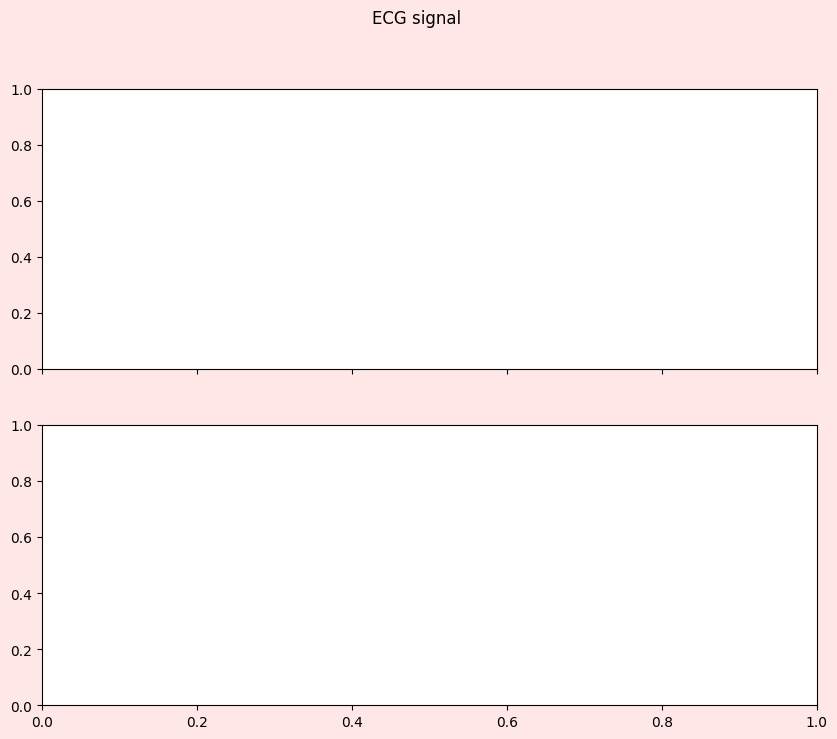

In [13]:
record = wfdb.rdrecord(os.path.join(config.RAW_DATA_DIR, 'mitdb', '100'))
annotation = wfdb.rdann(os.path.join(config.RAW_DATA_DIR, 'mitdb', '100'), 'atr')
print(f'Signal: {record.sig_name}')
print(f'Frequency: {record.fs}')
_ = plot_ecg(record, record.fs, t_start=120, annotation=annotation)


## Plot resampled data

Frequency: 500
Length: 902777


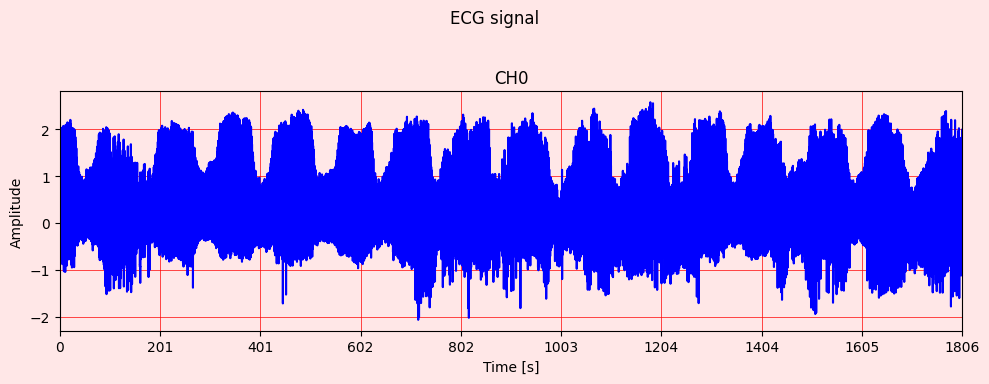

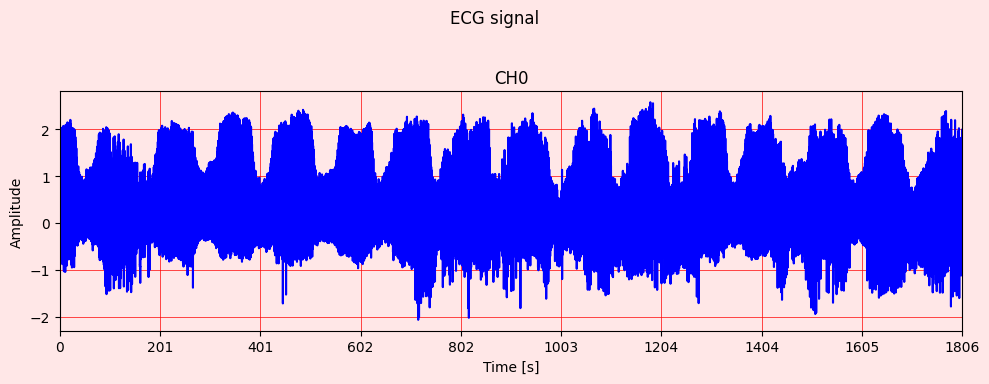

In [4]:
from wfdb import processing

t_fs = 500
x, t = processing.resample_sig(record.p_signal[:, 0], record.fs, t_fs)
print(f'Frequency: {t_fs}')
print(f'Length: {len(x)}')
plot_ecg(x, t_fs)

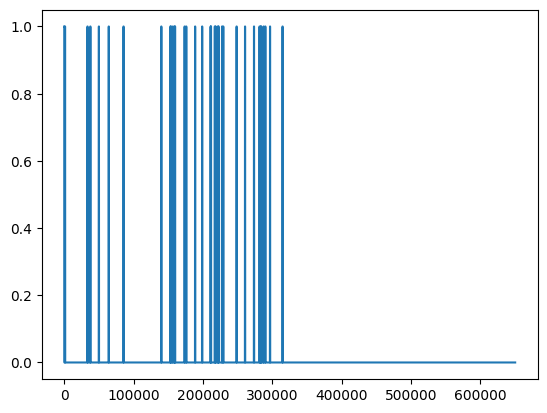

In [10]:
from src import dataset
from matplotlib import pyplot as plt

v = dataset.ann2vec(annotation, record.fs)
plt.plot(v)